<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_11/blob/main/DS_HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнє завдання**



В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.



На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.



Порівняйте результати та зробіть висновки.

# **Dataset imdb**

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [11]:
display(imdb)

<module 'keras.datasets.imdb' from '/usr/local/lib/python3.10/dist-packages/keras/datasets/imdb/__init__.py'>

In [14]:
from keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Understanding the structure
# The data is preprocessed such that each review is encoded as a sequence of integers,
# where each integer represents a word in the review.
# Labels are binary: 0 for negative reviews and 1 for positive reviews.

# Accessing the data
# Let's print the first review and its label
print("Review:")
print(train_data[1000])  # This will print the integer sequence representing the first review
print("Label:")
print(train_labels[1000])  # This will print the label of the first review (0 or 1)

Review:
[1, 261, 13, 69, 110, 2, 11, 6, 750, 96, 145, 11, 2, 13, 426, 377, 233, 7, 4, 114, 549, 18, 3482, 1218, 7, 3199, 2102, 620, 5, 997, 429, 6, 4157, 7, 1654, 3404, 5, 1387, 2795, 4, 277, 10, 10, 103, 886, 49, 7, 4, 85, 857, 13, 1637, 56, 6, 1039, 7, 4, 4700, 626, 288, 8, 280, 174, 2541, 4, 182, 7, 2, 10, 10, 12, 505, 46, 14, 9, 31, 7, 148, 108, 1055, 315, 4, 7423, 15, 62, 140, 2555, 8, 374, 639, 4, 22, 381, 5810, 2, 3199, 2102, 17, 4409, 2, 2, 46, 7, 4, 1336, 8, 2, 4, 2952, 7, 2, 8, 2541, 5, 2363, 1176, 4, 500, 6, 2, 2, 2, 34, 4, 4698, 37, 9090, 27, 84, 34, 4578, 51, 934, 40, 2, 671, 4, 3359, 7, 4, 1973, 2290, 4, 323, 1650, 4824, 1510, 4409, 9, 4415, 11, 4, 1647, 1733, 34, 2549, 2, 37, 115, 2466, 42, 889, 4, 313, 280, 4415, 497, 8, 3890, 11, 19, 4, 5751, 34, 1658, 6, 1927, 767, 2, 19, 2, 7, 1336, 5, 428, 2964, 8, 135, 2, 659, 309, 620, 5, 997, 18, 27, 113, 367, 4, 1654, 1986, 7, 2, 23, 27, 96, 8, 6, 1304, 19, 4205, 5, 4, 500, 10, 10, 323, 3199, 2102, 16, 1815, 3009, 34, 167, 670, 

In [36]:
display(y_train.shape)
display(input_train.shape)

(25000,)

(25000,)

In [13]:
from keras.datasets import imdb
import numpy as np

# Load the dataset with the word index
(train_data, train_labels), _ = imdb.load_data(num_words=10000, index_from=3)

# Load the word index
word_index = imdb.get_word_index()

# Reverse the word index (mapping integer indices to words)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the review
def decode_review(review):
    # Decode the review using the reverse_word_index
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

# Decode and print the first review
decoded_review = decode_review(train_data[0])
print("Decoded Review:")
print(decoded_review)

# Print its label
print("Label:")
print(train_labels[0])

1641221/1641221 [==============================] - 0s 0us/step
Decoded Review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these c

In [26]:
for key in list(word_index.keys())[:5]:
    print(key, word_index[key])

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951


In [28]:
for key in list (reverse_word_index.keys())[:5]:
  print(key, reverse_word_index[key])

34701 fawn
52006 tsukino
52007 nunnery
16816 sonja
63951 vani


In [29]:
reverse_word_index[52007]

'nunnery'

# **Version 1**

LSTM модель

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

**Встановлюємо гіперпараметри:**

In [4]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32


**Завантаження даних:**

In [5]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

17464789/17464789 [==============================] - 1s 0us/step


**Передпроцесинг послідовних даних:**

In [6]:
input_train = pad_sequences(input_train, maxlen=maxlen) # Доповнює послідовність до однакової довжини (maxlen) якщо недостатньо данних
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

**Побудова моделі LSTM:**

In [7]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання LSTM шару з 32 вузлами
model.add(LSTM(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

**Компіляція моделі:**

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

**Виведення опису моделі:**

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Навчання моделі:**

In [10]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 [==============================] - 21s 126ms/step - loss: 0.6003 - acc: 0.6722 - val_loss: 0.4372 - val_acc: 0.8219
Epoch 2/5
137/137 [==============================] - 14s 101ms/step - loss: 0.3666 - acc: 0.8474 - val_loss: 0.3835 - val_acc: 0.8327
Epoch 3/5
137/137 [==============================] - 11s 79ms/step - loss: 0.2809 - acc: 0.8923 - val_loss: 0.3111 - val_acc: 0.8731
Epoch 4/5
137/137 [==============================] - 10s 73ms/step - loss: 0.2347 - acc: 0.9098 - val_loss: 0.3061 - val_acc: 0.8700
Epoch 5/5
137/137 [==============================] - 9s 65ms/step - loss: 0.2024 - acc: 0.9273 - val_loss: 0.4818 - val_acc: 0.8315


**Відображення результатів:**

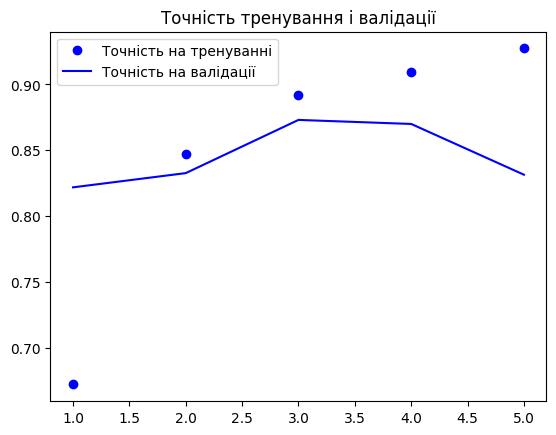

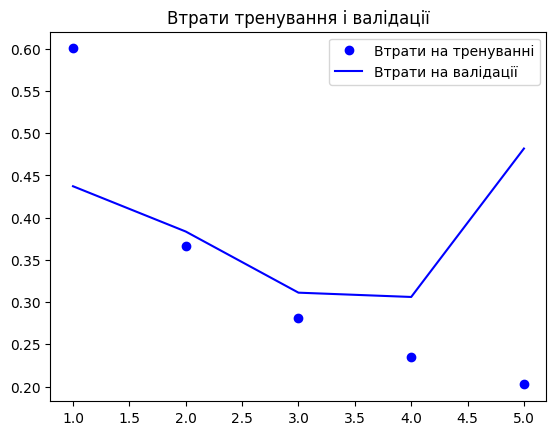

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

**Прогнозування з використанням навченої моделі:**

In [12]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 7s 9ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 7s 9ms/step - loss: 0.5308 - acc: 0.8109
Test Loss: 0.5307896137237549
Test Accuracy: 0.8108800053596497


# **Version 2**

Зменшимо кількість єлементів (units) у lSTM layer з 32 до 16

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 323153 (1.23 MB)
Trainable params: 323153 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 16s 100ms/step - loss: 0.6519 - acc: 0.6225 - val_loss: 0.5504 - val_acc: 0.7187
Epoch 2/5
137/137 [==============================] - 11s 78ms/step - loss: 0.4210 - acc: 0.8250 - val_loss: 0.3584 - val_acc: 0.8569
Epoch 3/5
137/1

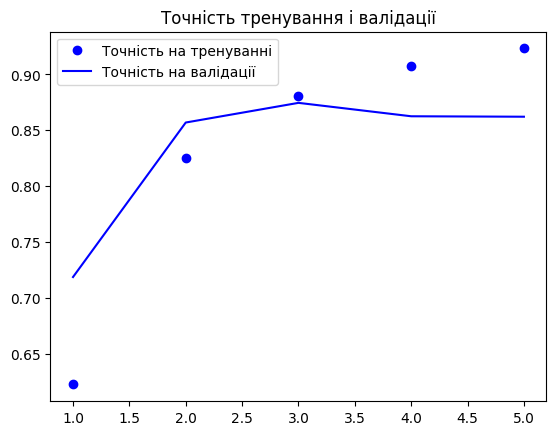

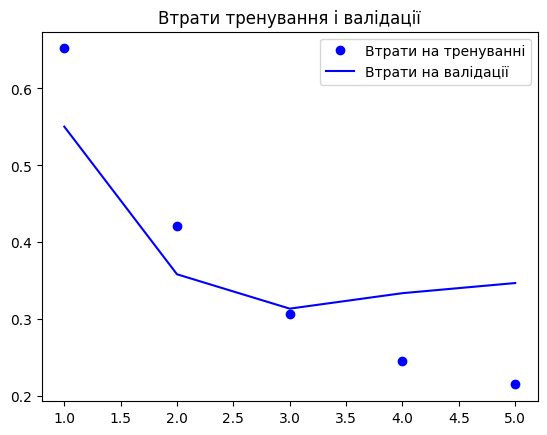

782/782 [==============================] - 6s 7ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 7s 8ms/step - loss: 0.3662 - acc: 0.8532
Test Loss: 0.3662111461162567
Test Accuracy: 0.85316002368927


In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

# **Version 3**

Збільшимо кількість єлементів (units) у lSTM layer з 32 до 64

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344897 (1.32 MB)
Trainable params: 344897 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 15s 97ms/step - loss: 0.6203 - acc: 0.6450 - val_loss: 0.4841 - val_acc: 0.7712
Epoch 2/5
137/137 [==============================] - 11s 78ms/step - loss: 0.4107 - acc: 0.8299 - val_loss: 0.3613 - val_acc: 0.8569
Epoch 3/5
137/13

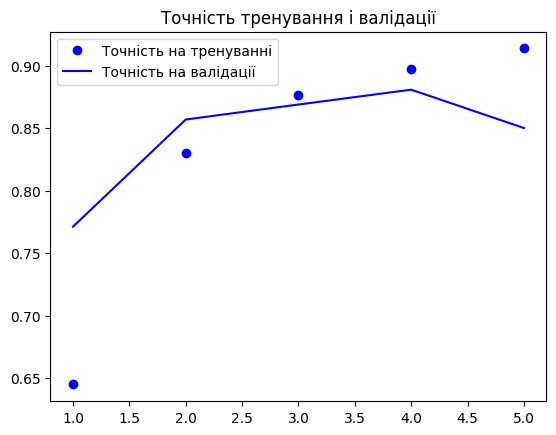

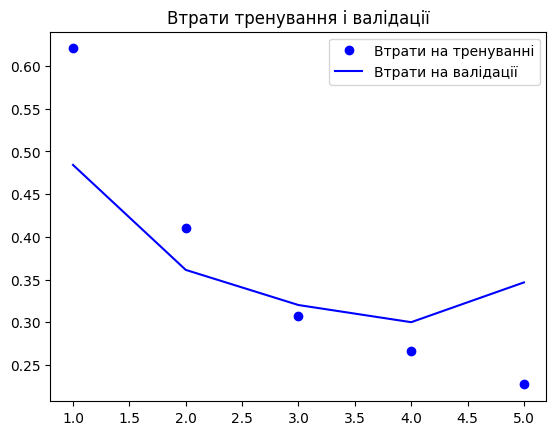

782/782 [==============================] - 7s 9ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 7s 9ms/step - loss: 0.3515 - acc: 0.8477
Test Loss: 0.35152116417884827
Test Accuracy: 0.8476799726486206


In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

# **Version 4**

Використуєм BRNN

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
137/137 [==============================] - 18s 106ms/step - loss: 0.6615 - acc: 0.5985 - val_loss: 0.5436 - val_acc: 0.7568
Epoch 2/5
137/137 [==============================] - 12s 91ms/step - loss: 0.4360 

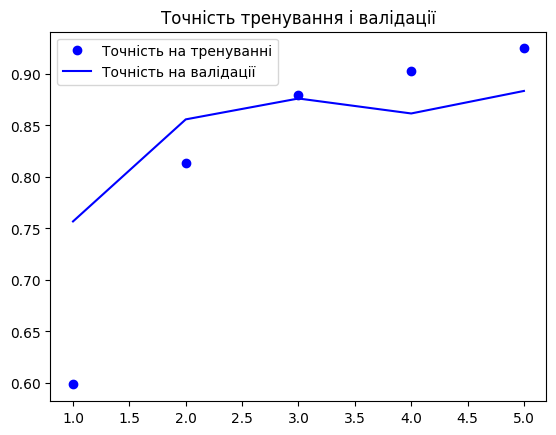

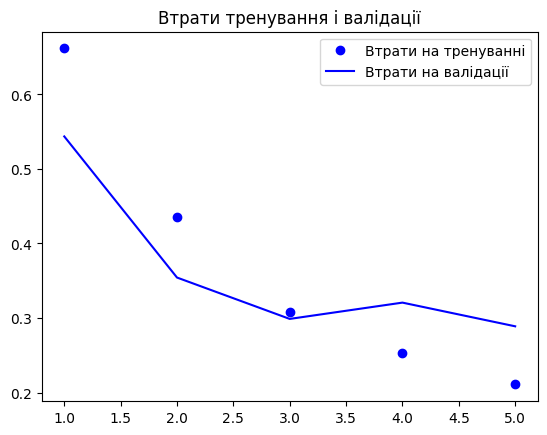

782/782 [==============================] - 12s 15ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 12s 15ms/step - loss: 0.3020 - acc: 0.8784
Test Loss: 0.30199676752090454
Test Accuracy: 0.8783599734306335


In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

# **Version 5**

Використовуєм Deep BRNN

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
137/137 

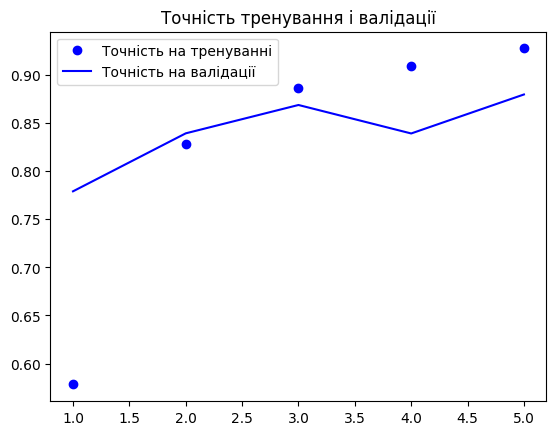

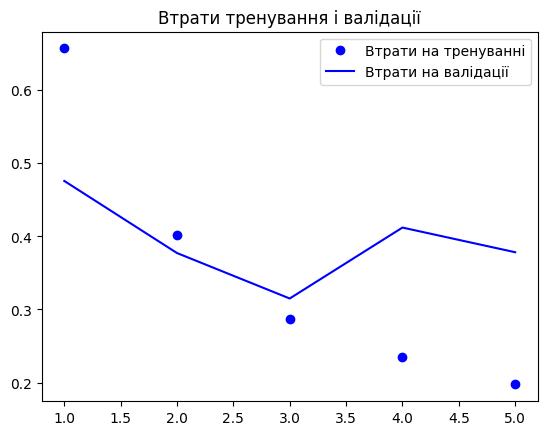

782/782 [==============================] - 23s 28ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 22s 29ms/step - loss: 0.3993 - acc: 0.8692
Test Loss: 0.3993472158908844
Test Accuracy: 0.8692399859428406


In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

# **Висновок**

При використанняі рекурентної нейроної мережи для датасету IMDB було помічено що модель бистро навчаєтся (3-4 епохи). Подальше тренування моделі веде до перенавчання. Гарний результат покзала модель з BRNN. Ускладнена модел Deep BRNN нажаль показала результат гірше.